https://github.com/Anjana-achariya/ML_ASSIGNMENT_DEEPEDGE.git

Anjana - ML Assignment - Supervised Regression
DeepEdge - ML Engineer Intern

The objective of the project us to predict the coordinates (x,y) of a pixel which has a value of 255 for 1 pixel in a given 50x50 pixel grayscale image and all other pixels are 0.



Importing needed libraries according to the objective .

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Flatten, Dense
from tensorflow.keras.optimizers import Adam

generate dataset for the project

In [ ]:
def gen(num_samples=5000):
    images = []
    labels = []

    for i in range(num_samples):
        img = np.zeros((50, 50))
        x = np.random.randint(0, 50)
        y = np.random.randint(0, 50)
        img[y, x] = 255

        images.append(img)
        labels.append([x, y])

    return np.array(images), np.array(labels)


the funct gen() by default gerate 5000 images . genrated images are stored in images[ ] and labels [] stores (x,y) =255 .

Images are generate with 50 X 50 zeros , where one coordinate [row , column] is 255 .

this fucnt returns array of images and labels ( X and y ) .

I genrated random coordinates for 255 so that model doesn't learn order of pattern occurance or placement , from the images .



In [ ]:
X ,y = generate_dataset()
X = X/255.0
n = len(X)
print(len(X))
X = X.reshape(n,50,50,1)
print(X.shape)
print(y.shape)

5000
(5000, 50, 50, 1)
(5000, 2)


the above code genrate the dataset X (images) , y (labels) by using the funciotn gen() .



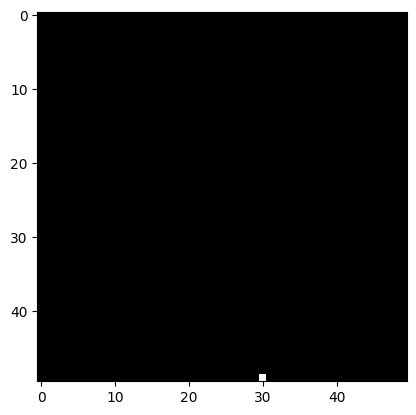

In [ ]:
plt.imshow(X[0].squeeze() , cmap="gray")
plt.show()

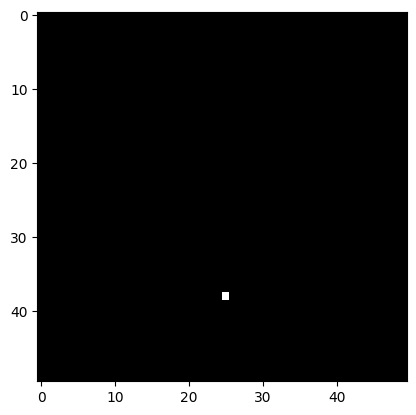

In [ ]:
plt.imshow(X[1].squeeze() , cmap="gray")
plt.show()

For image classificatio n the classic and best suited mmodel is CNN .
I have built a simple architecture with 2 convolutional layer for extracting features , 2 maxpooling layer for dimensional reduction . flatten layer to convert into 1D . And a dense layers which connects every neuron with ouput .

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(50, 50, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(2)])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


To update the weights i used Adam optimizer

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss="mse")
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,570 (1006.13 KB)

 Trainable params: 257,570 (1006.13 KB)

 Non-trainable params: 0 (0.00 B)

fiting the model with X and y . input images and coordinate labels of 255

In [ ]:
history = model.fit(X, y,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 410.3111 - val_loss: 92.8131
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 53.4126 - val_loss: 25.3314
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 22.7941 - val_loss: 15.4681
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 15.8414 - val_loss: 11.7666
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 12.3421 - val_loss: 9.4856
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 8.8064 - val_loss: 7.5847
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 7.1462 - val_loss: 6.1871
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 5.4764 - val_loss: 5.3187
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 4.4928 - val_loss: 4.8795
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 3.4339 - val_loss: 3.3396


the mse for training is 3.4339 and for validation 3.3396

In [ ]:
img = np.zeros((50, 50))
X_test = np.random.randint(0, 50)
y_test= np.random.randint(0, 50)
img[y_test, X_test] = 255
print(X_test,y_test)

44 26


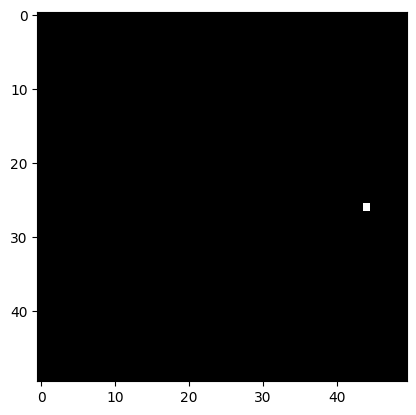

In [ ]:
plt.imshow(img.squeeze() , cmap="gray")
plt.show()

Predicing with a randomly generated image (50 X 50 )

In [ ]:
img = img/255.0
y_pred = model.predict(img.reshape(-1,50,50,1))
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[42.027946 26.382315]]


Thank you .